In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data\AbandonoEmpleados.csv', sep =';', index_col='id', na_values='#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


# BUSINESS ANALYTICS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

## Null Analysis

In [5]:
miss = df.isna().sum().sort_values(ascending=False)
miss

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [6]:

miss_percentage = miss / len(df)
filtered = miss_percentage[miss_percentage != 0]
filtered

anos_en_puesto          0.842177
conciliacion            0.687755
sexo                    0.135374
educacion               0.068707
satisfaccion_trabajo    0.051701
implicacion             0.012245
dtype: float64

[Text(0.5, 1.0, 'Percentage of missing values'), Text(0, 0.5, 'Variables')]

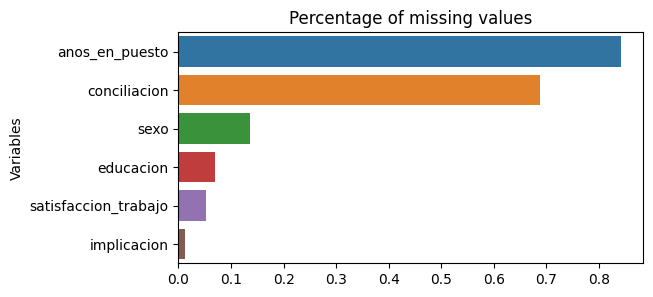

In [7]:
plt.figure(figsize=(6,3))
sns.barplot(x=filtered.values, y=filtered.index).set(title='Percentage of missing values', ylabel='Variables')


#### Conclusions
- anos_en_puesto, conciliacion -> delete variables
- sexo,educacion,satisfaccion_trabajo,implicacion -> imputed after EDA

### Elimination of variables with 30% or more missing data

In [8]:
df.drop(columns=['anos_en_puesto','conciliacion'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [9]:
obj =df.select_dtypes('O')
obj.shape[1]

14

## EDA - Categorical VariablesData

In [10]:
from math import ceil

def eda_categorical_chart(cat):
    n_rows_subplot = ceil(cat.shape[1]/2)
    g,ax = plt.subplots(nrows=n_rows_subplot, ncols= 2, figsize= (16, n_rows_subplot*6))
    ax = ax.flat
    
    for my_index, my_column in enumerate(cat):
        cat[my_column].value_counts().plot.barh(ax=ax[my_index])
        ax[my_index].set_title(my_column,fontsize=12,fontweight='bold')
        ax[my_index].tick_params(labelsize=12)
        

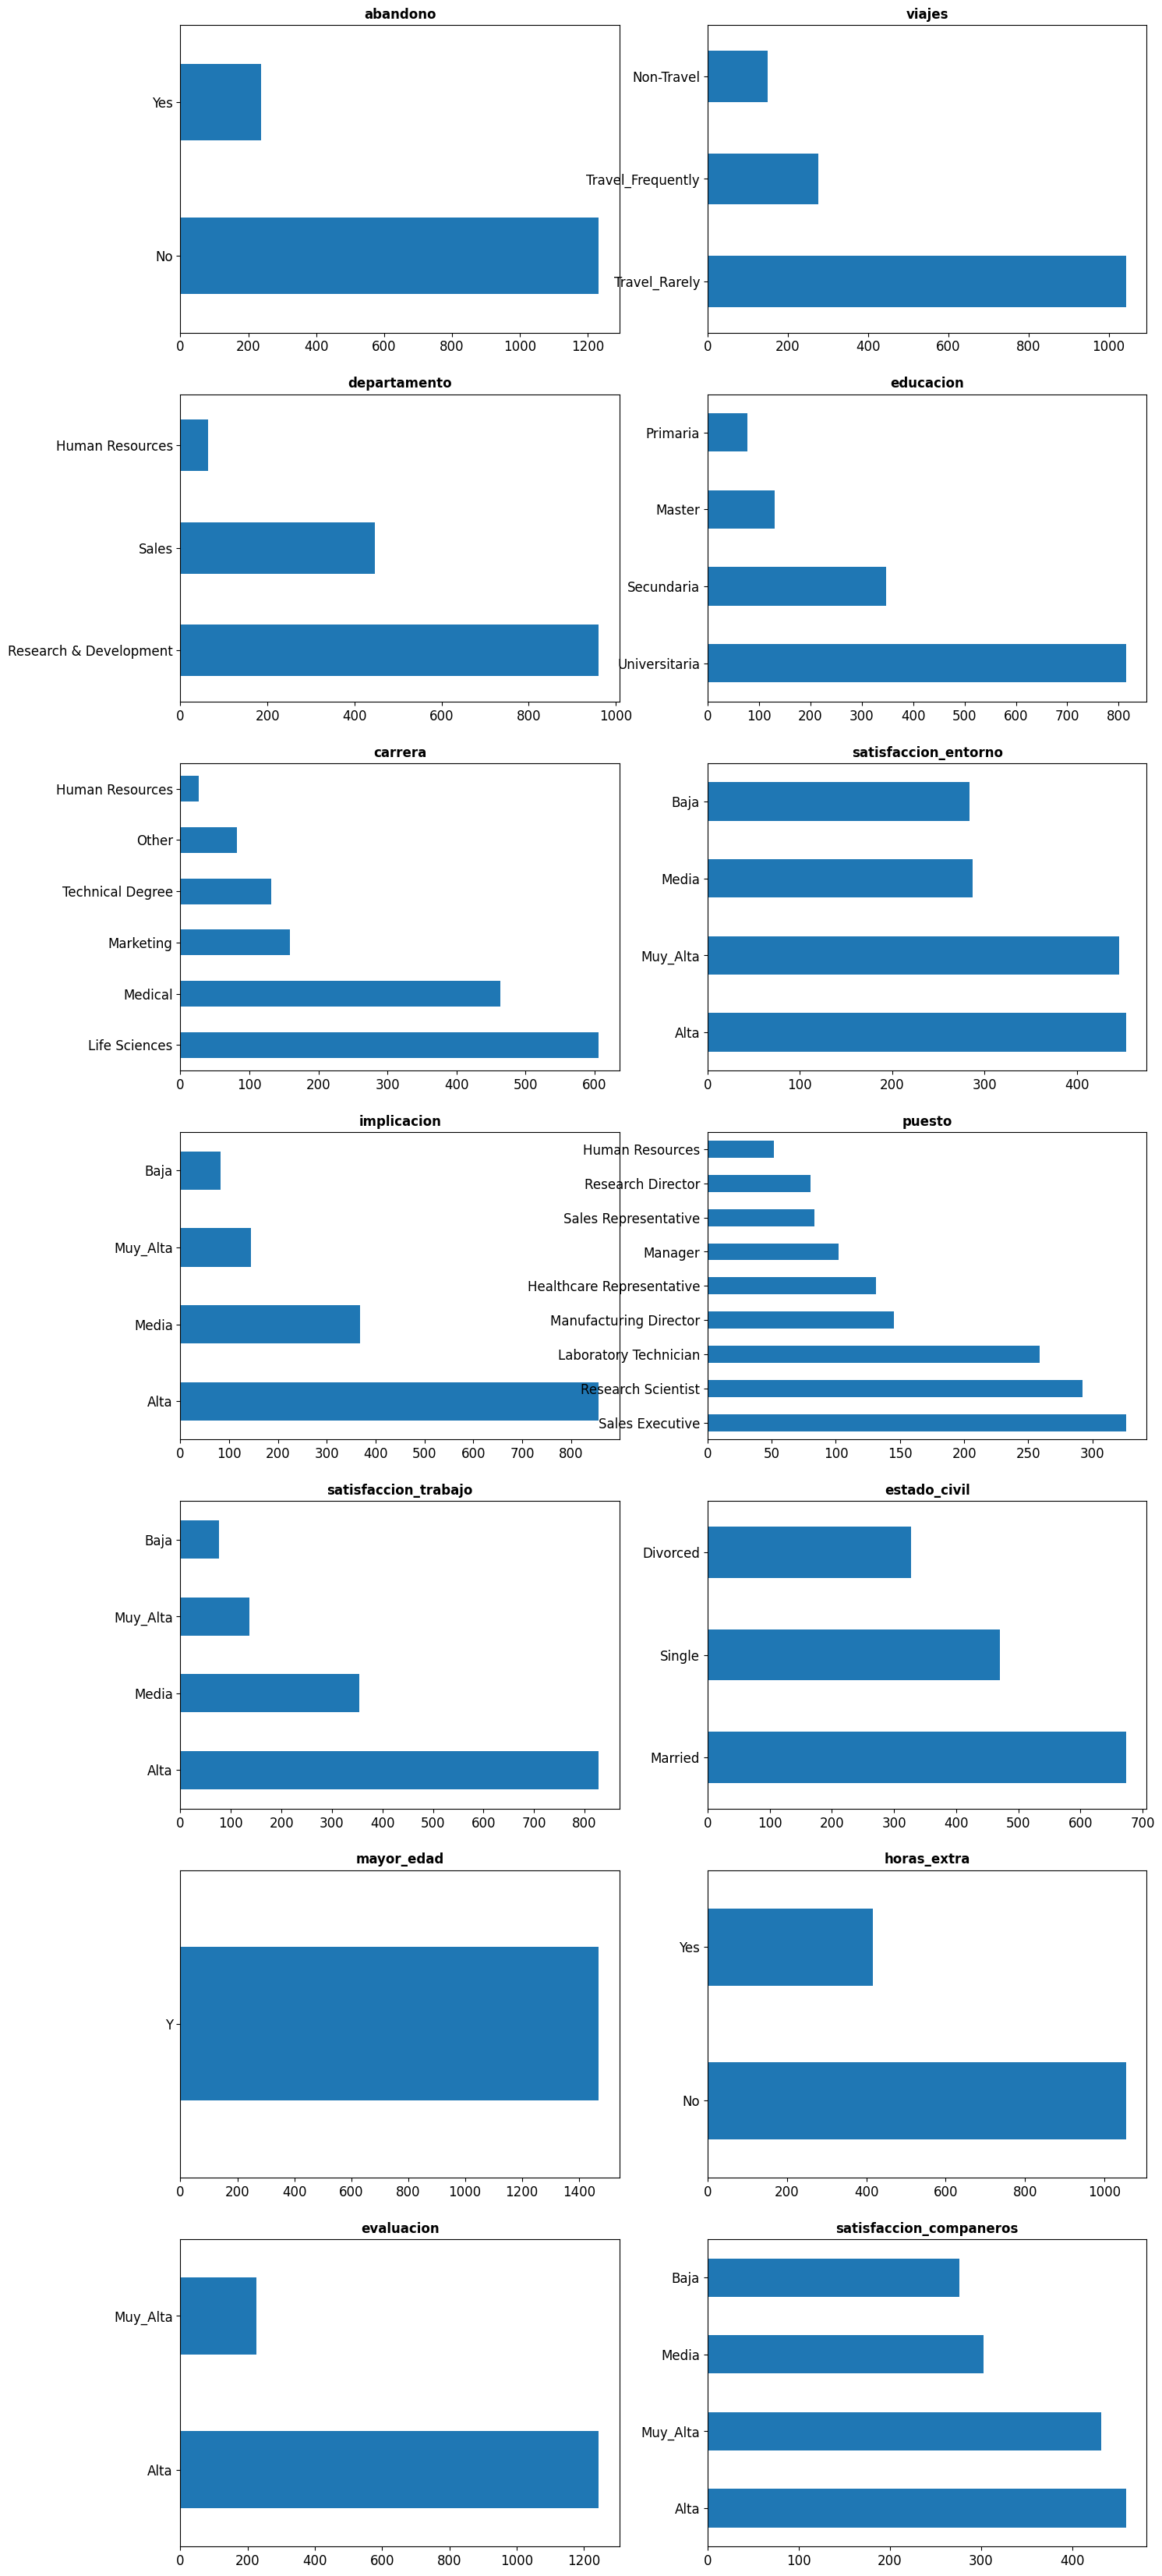

In [11]:
eda_categorical_chart(df.select_dtypes('O'))

### Conclutions
* mayor_edad has a single value -> delete variable

* pending inputations:
    * educacion -> Universitaria 
    * satisfaccion_trabajo -> Alta
    * implicacion -> Alta

In [12]:
df.drop(columns = 'mayor_edad', inplace=True)
df['educacion'] = df['educacion'].fillna('Universitaria')
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

## EDA - Numerical Variables

In [13]:
df.select_dtypes('number').describe()

,edad,distancia_casa,empleados,sexo,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
count,1470.000000,1470.000000,1470.0,1271.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1.0,2.727773,2.063946,6502.931293,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129
std,9.135373,8.106864,0.0,0.720788,1.106940,4707.956783,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136
min,18.000000,1.000000,1.0,1.000000,1.000000,1009.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,2.000000,1.000000,2911.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,1.0,3.000000,2.000000,4919.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,1.0,3.000000,3.000000,8379.000000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,1.0,4.000000,5.000000,19999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [14]:
def my_describe(num):
    des = num.describe().T
    des['median'] = num.median()
    #sorting columns
    des = des.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(des)

In [15]:
my_describe(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


### Conclutions
* empleados has a single value -> delete
* sexo has 4 values -> delete/ we don't know why it has 4 values.
* horas_quincena has a single value -> delete.

In [16]:
df.drop(columns=['empleados', 'sexo', 'horas_quincena'], inplace=True)


## INSIGHTS

### What is the abandonment rate?

In [17]:
abandonment_rate = df.abandono.value_counts(normalize=True)*100
abandonment_rate

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

<AxesSubplot: >

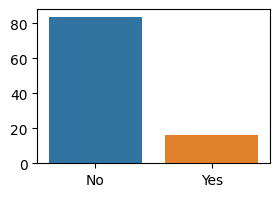

In [18]:
plt.figure(figsize=(3,2))
sns.barplot(x=abandonment_rate.index, y=abandonment_rate.values)

### Is there a employee profile that leaves the company?

In [19]:
# Transforming abandono values to numerical
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

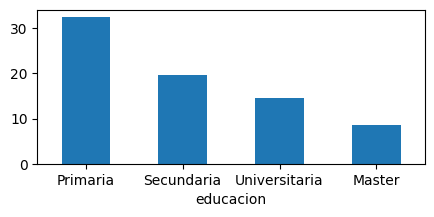

In [20]:
temp = df.groupby('educacion').abandono.mean().sort_values(ascending=False)*100
plt.figure(figsize=(5, 2))
ax = temp.plot.bar()
ax.set_xticklabels(temp.index, rotation = 0)
plt.show()

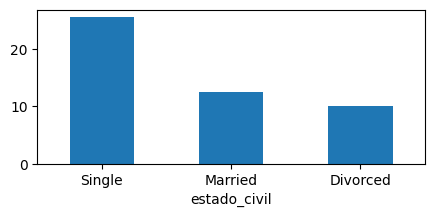

In [21]:
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending=False)*100
plt.figure(figsize=(5, 2))
ax = temp.plot.bar()
ax.set_xticklabels(temp.index, rotation = 0)
plt.show()

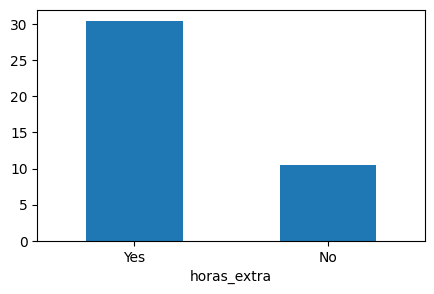

In [22]:
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending=False)*100
plt.figure(figsize=(5, 3))
ax = temp.plot.bar()
ax.set_xticklabels(temp.index, rotation = 0)
plt.show()

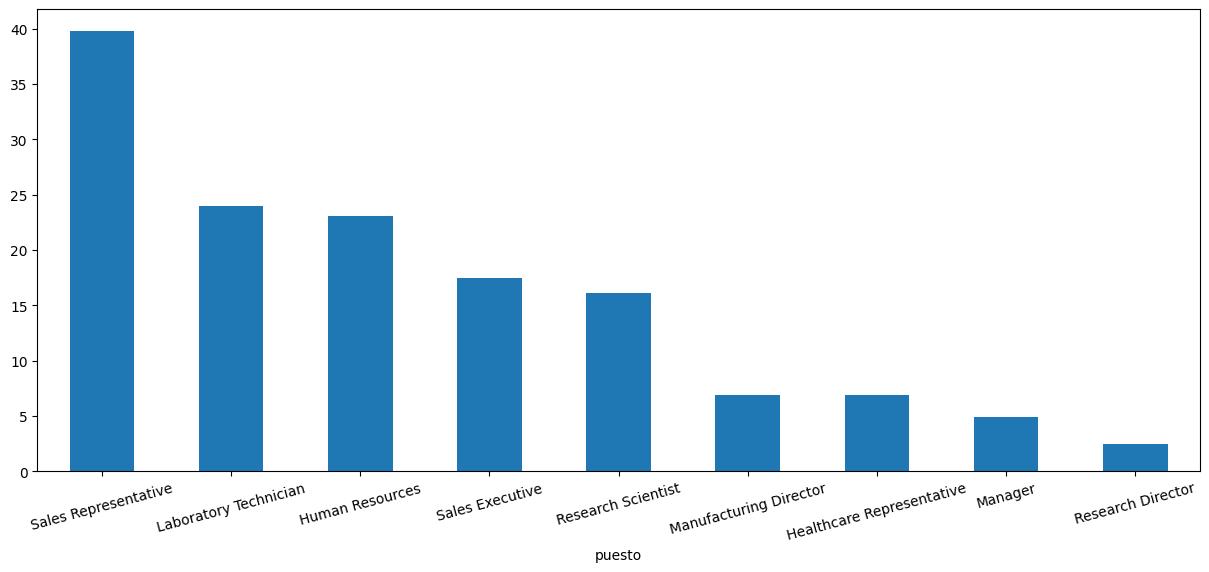

In [23]:
temp = df.groupby('puesto').abandono.mean().sort_values(ascending=False)*100
plt.figure(figsize=(15, 6))
ax = temp.plot.bar()
ax.set_xticklabels(temp.index, rotation = 15)
plt.show()

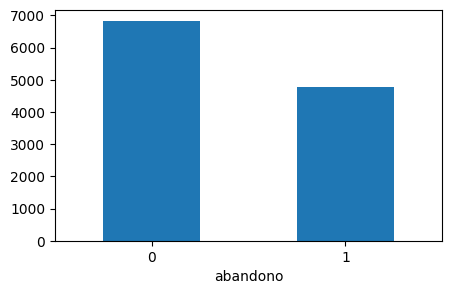

In [24]:
temp = df.groupby('abandono').salario_mes.mean().sort_values(ascending=False)
plt.figure(figsize=(5, 3))
ax = temp.plot.bar()
ax.set_xticklabels(temp.index, rotation = 0)
plt.show()

### Profile
* low educational level - Primaria
* Single
* Works in sales
* Works overtime

### Wich is the economic impact of this problem?

In [25]:
# Creating a new variable anual_salary
df['salario_anual'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes', 'salario_anual']]

,salario_mes,salario_anual
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [26]:
# Calculte the economic impact if the employee leave the company
conditions = [(df['salario_anual'] <= 30000),
              (df['salario_anual'] > 30000) & (df['salario_anual'] < 50000),
              (df['salario_anual'] > 50000) & (df['salario_anual'] <= 75000),
              (df['salario_anual'] > 75000)]

results = [df.salario_anual * 0.161, df.salario_anual * 0.197,\
           df.salario_anual * 0.204, df.salario_anual * 0.21]

df['impacto_abandono'] = np.select(conditions, results, default=-999)
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352


### How much has this problem cost us in the last year?

In [27]:
coste_total = df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

### How much does it cost us that employees aren't motivated?

In [28]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

### How much could we save by building employee loyalty?

In [29]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.
